In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io

In [77]:
data=io.loadmat('data.mat')
path='data/data_2.npz'
df=np.load(path)

In [78]:
directions=data['directions']
xyz=data['xyz']
src=data['src_model']
S=df['S'][0]
directions

array([[  0.5,  88.3, 185.1, 233. , 262.7],
       [  0.5,  88.3, 184.7, 233.6, 262.7],
       [  0.5,  88.1, 185.1, 233.8, 262.7],
       [  0.5,  87.9, 185.5, 232.4, 262.1],
       [  0.5,  88.4, 184.8, 234.1, 263.1],
       [  0.5,  88.2, 184.6, 234.2, 262.6],
       [  0.5,  88.3, 185. , 233.1, 262.8],
       [  0.5,  88.2, 185.1, 233. , 263. ],
       [  0.5,  88.2, 184.8, 233.2, 262.7],
       [  0.5,  88.2, 185.7, 232.7, 262.5]])

In [84]:
lambda_ = 0.336845458426966
sigma = 0.1
C0 = 0.8
B = 2e6 
N=src.shape[0]
r=src[:,0:2].T
r.shape

(2, 121)

In [85]:
R_user = np.zeros(directions.shape+(121,))
R_user.shape

(10, 5, 121)

In [87]:
for i in range(directions.shape[0]):
    for j in range(directions.shape[1]):
        angle=directions[i,j]/360*2*np.pi
        a=np.exp(-1j*2*np.pi/lambda_*(xyz@[np.cos(angle),np.sin(angle)])).reshape(15,-1)
        w=np.dot(np.linalg.inv(S),a)/(np.dot(a.conj().T,np.dot(np.linalg.inv(S),a)))
        b_gain=abs(w[:,0]@np.exp(1j*2*np.pi*np.dot(xyz,r)/(lambda_)))
        for k in range(N):
            R_user[i,j,k]=B*np.log2(1+b_gain[i]/sigma*C0)

R_aver=np.mean(R_user)/N
R_aver

25788.733832119193

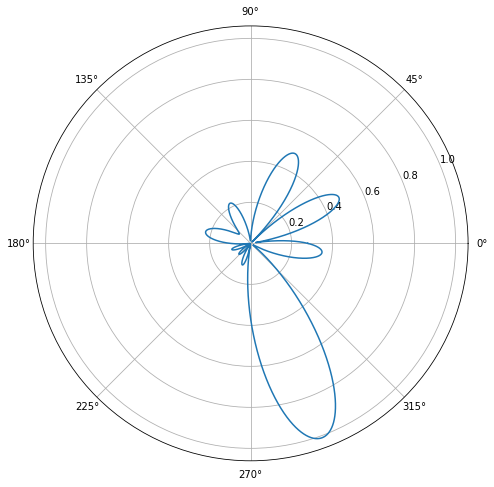

In [88]:
N=10000
thetas=np.linspace(0,2*np.pi,N)
r=np.array([np.cos(thetas),np.sin(thetas)])

angle=288/360*2*np.pi
a=np.exp(-1j*2*np.pi/lambda_*(xyz@[np.cos(angle),np.sin(angle)])).reshape(15,-1)
w=np.dot(np.linalg.inv(S),a)/(np.dot(a.conj().T,np.dot(np.linalg.inv(S),a)))
b_gain=abs(w[:,0]@np.exp(1j*2*np.pi*np.dot(xyz,r)/(lambda_)))

plt.figure(figsize=(10,8))
plt.polar()
plt.plot(np.arange(N)/N*2*np.pi,b_gain)
plt.show()